In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
# Headers for request
HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36', 'Accept-Language': 'pt-br, en;q=0.5'}) #add your user agent 

In [3]:
URL = 'https://www.amazon.com.br/s?k=playstation+5&sprefix=playstation+%2Caps%2C332&ref=nb_sb_ss_ts-doa-p_1_12'

In [4]:
# HTTP Request
webpage = requests.get(URL, headers=HEADERS)

In [5]:
webpage

<Response [200]>

Answer as 200 you have sucessfully requested the URL

In [6]:
webpage.content

b'<!doctype html><html lang="pt-br" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function()

In [7]:
type(webpage.content)

bytes

## Now we use beautiful soup to change the type of information!!

In [8]:
# Soup Object containiang all data
soup = BeautifulSoup(webpage.content, "html.parser")

In [9]:
# Fetch links as List of Tag Objects
links = soup.find_all("a", attrs={'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})
links[0]

<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/PlayStation-CFI-1214A01X-Console-5/dp/B0BNSR3MW9/ref=sr_1_1?keywords=playstation+5&amp;qid=1690238776&amp;sprefix=playstation+%2Caps%2C332&amp;sr=8-1&amp;ufe=app_do%3Aamzn1.fos.25548f35-0de7-44b3-b28e-0f56f3f96147"><span class="a-size-base-plus a-color-base a-text-normal">Console PlayStation 5</span> </a>

In [10]:
links[0].get('href')

'/PlayStation-CFI-1214A01X-Console-5/dp/B0BNSR3MW9/ref=sr_1_1?keywords=playstation+5&qid=1690238776&sprefix=playstation+%2Caps%2C332&sr=8-1&ufe=app_do%3Aamzn1.fos.25548f35-0de7-44b3-b28e-0f56f3f96147'

In [11]:
link = links[0].get('href')

## To get the entire link we add 'https://amazon.com'

In [12]:
product_list = "https://amazon.com" + link
product_list


'https://amazon.com/PlayStation-CFI-1214A01X-Console-5/dp/B0BNSR3MW9/ref=sr_1_1?keywords=playstation+5&qid=1690238776&sprefix=playstation+%2Caps%2C332&sr=8-1&ufe=app_do%3Aamzn1.fos.25548f35-0de7-44b3-b28e-0f56f3f96147'

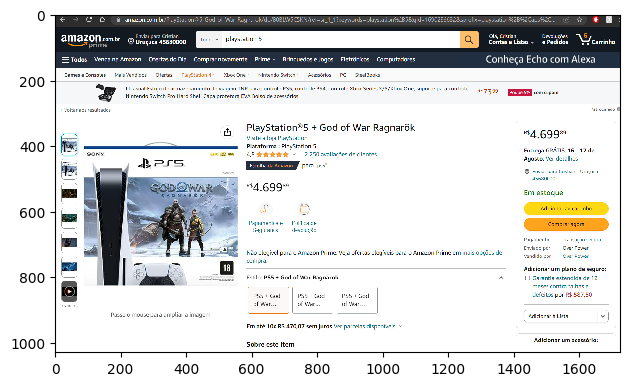

In [13]:
from skimage import io
 
img = io.imread("ps5-image.png")
io.imshow(img)

## Repeating the proccess above to collect all data from the page of the first product

In [14]:
new_webpage = requests.get(product_list, headers=HEADERS)

In [15]:
new_webpage 

<Response [200]>

In [16]:
# Soup Object containiang all data
new_soup = BeautifulSoup(new_webpage.content, "html.parser")

In [17]:
new_soup

<!DOCTYPE html>

<!--[if lt IE 7]> <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8 a-lt-ie7"> <![endif]-->
<!--[if IE 7]>    <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8"> <![endif]-->
<!--[if IE 8]>    <html lang="en-us" class="a-no-js a-lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="a-no-js" lang="en-us"><!--<![endif]--><head>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title dir="ltr">Amazon.com</title>
<meta content="width=device-width" name="viewport"/>
<link href="https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUI-3c913031596ca78a3768f4e934b1cc02ce238101.secure.min._V1_.css" rel="stylesheet"/>
<script>

if (true === true) {
    var ue_t0 = (+ new Date()),
        ue_csm = window,
        ue = { t0: ue_t0, d: function() { return (+new Date() - ue_t0); } },
        ue_furl = "fls-na.amazon.com",
        ue_mid = "ATVPDKIKX0DER"

In [20]:
new_soup.find("span", attrs={"id":'productTitle'})